# Summary
In this notebook I load and explore the MIT stress dataset given [here](https://www.physionet.org/content/nstdb/1.0.0/) and that is being used [here](https://www.hindawi.com/journals/cmmm/2021/5527904/) to make ECG signals noisy.

In [7]:
# !pip3 install wfdb

In [17]:
import os
# set path to proj
os.chdir('/Users/davidharar/Documents/School/thesis/upstream_seq2seq/')

import wfdb
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

stress_data_path = './data/raw/mit-bih-noise-stress-test-database-1.0.0/'

In [22]:
BW = wfdb.rdrecord(stress_data_path+'bw')
EM = wfdb.rdrecord(stress_data_path+'em')
MA = wfdb.rdrecord(stress_data_path+'ma')

print('frequency signal')
print('\tBW:', BW.fs)
print('\tEM:', EM.fs)
print('\tMA:', MA.fs)
print('length')
print('\tBW:', (len(BW.p_signal)/BW.fs)/60, ' minutes.')
print('\tEM:', (len(EM.p_signal)/EM.fs)/60, ' minutes.')
print('\tMA:', (len(MA.p_signal)/MA.fs)/60, ' minutes.')

print('\n\n\n')



frequency signal
	BW: 360
	EM: 360
	MA: 360
length
	BW: 30.092592592592595  minutes.
	EM: 30.092592592592595  minutes.
	MA: 30.092592592592595  minutes.






## Going over the signal

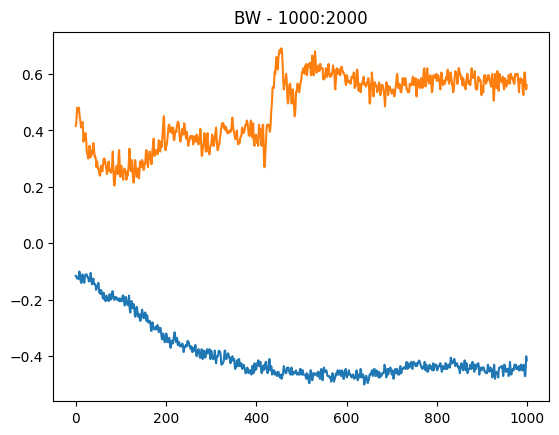

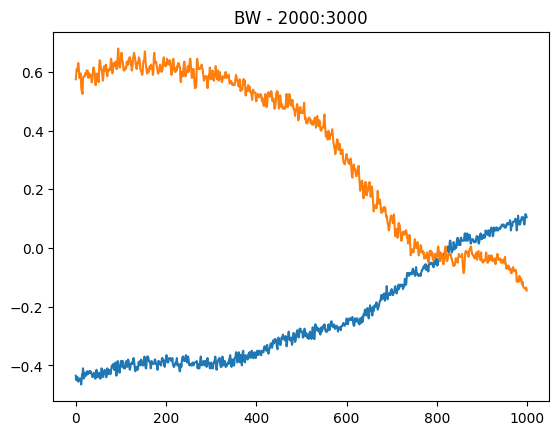

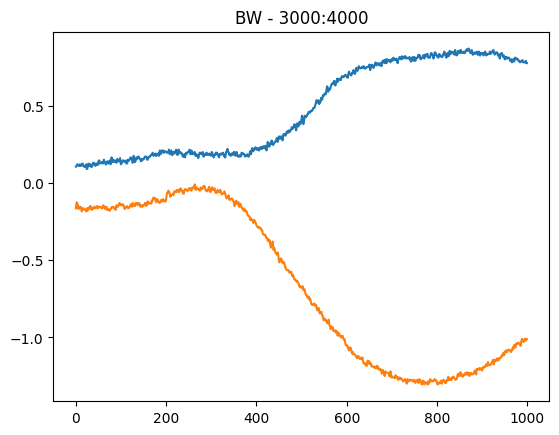

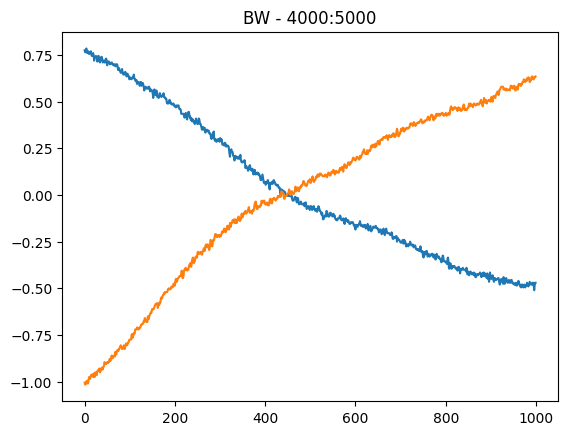

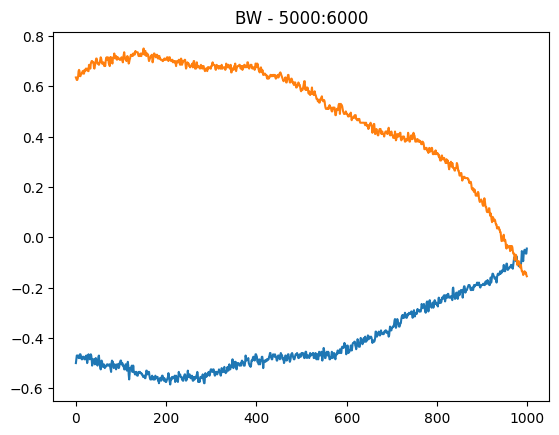

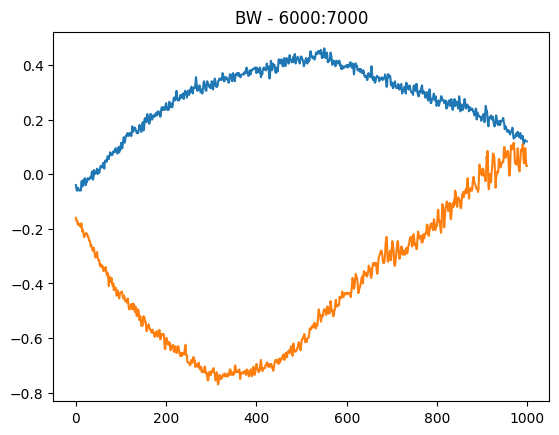

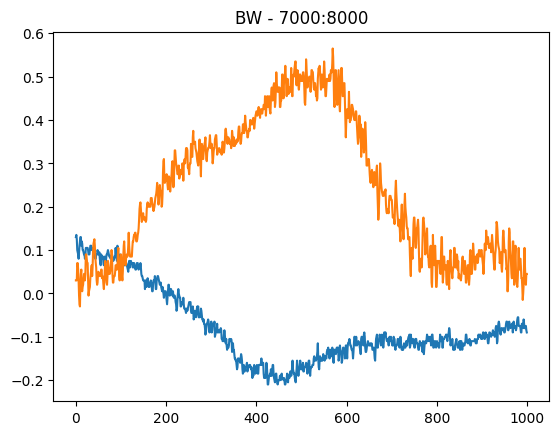

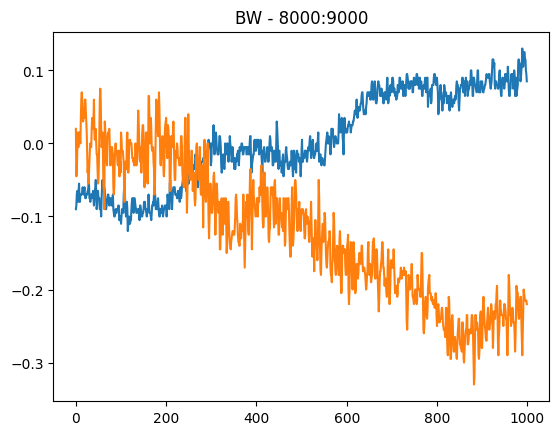

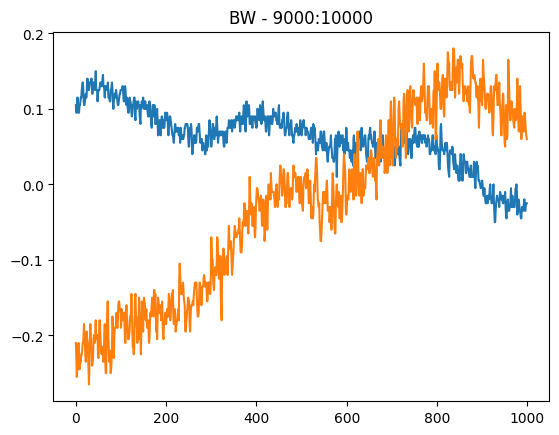

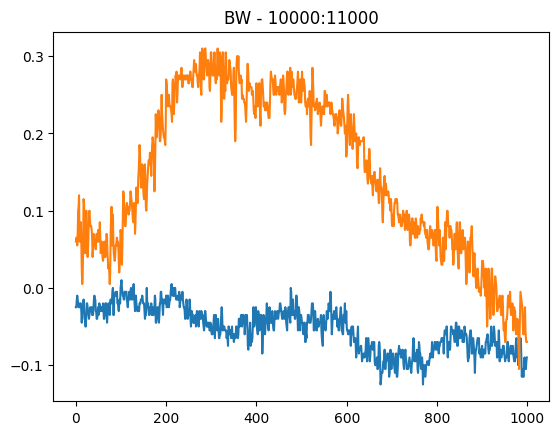

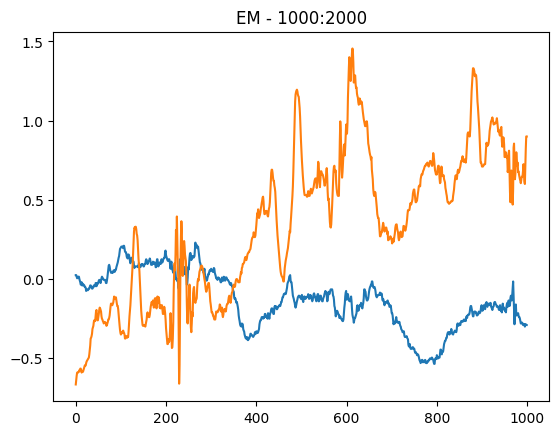

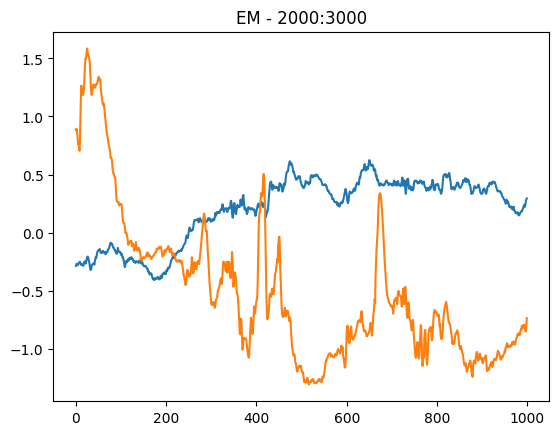

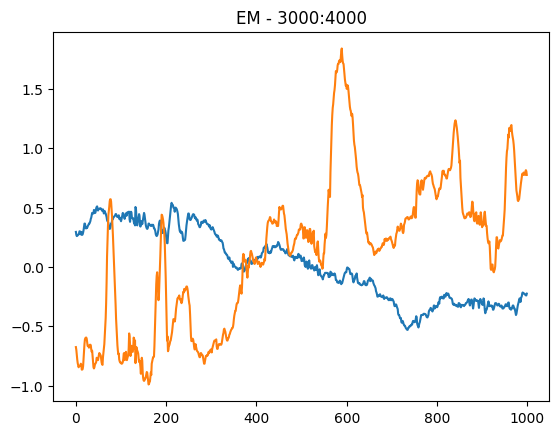

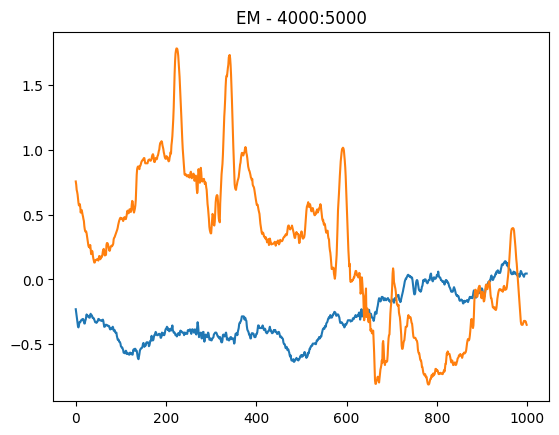

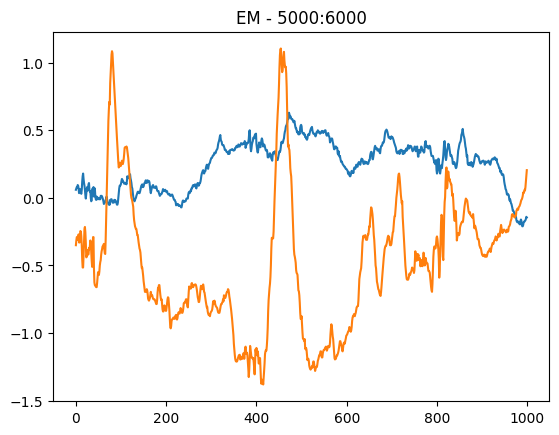

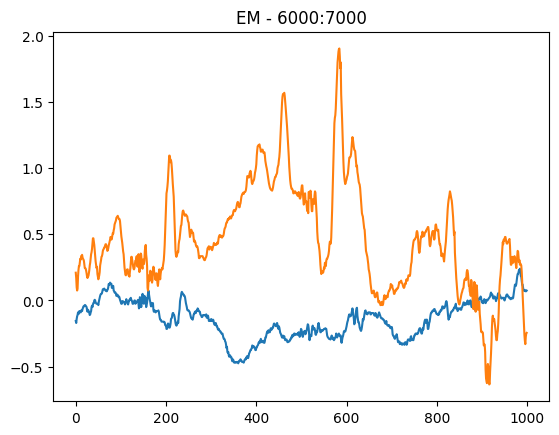

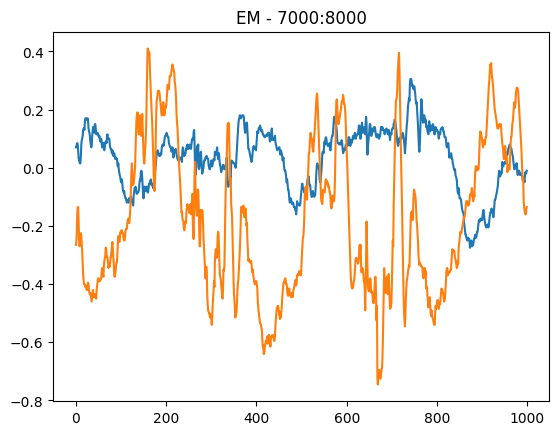

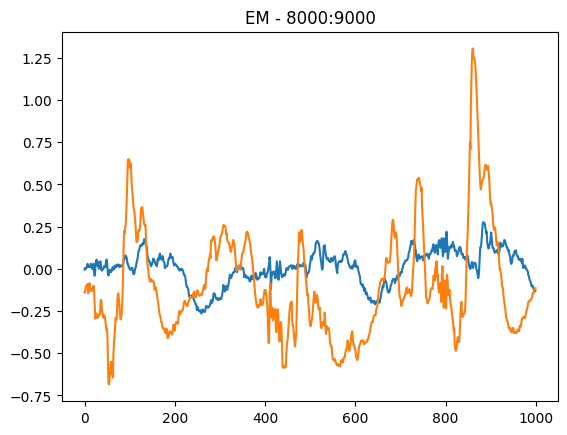

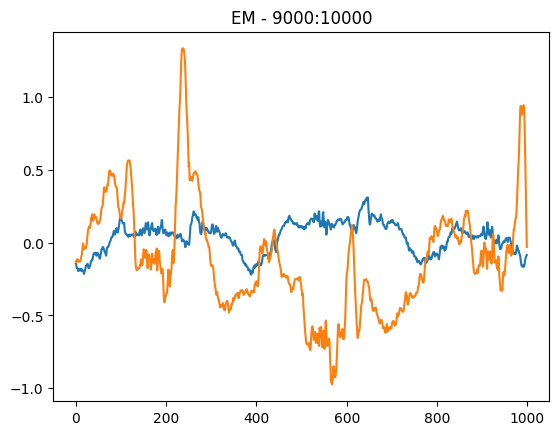

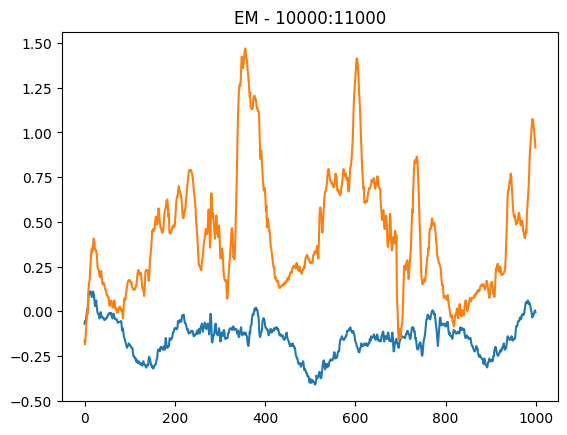

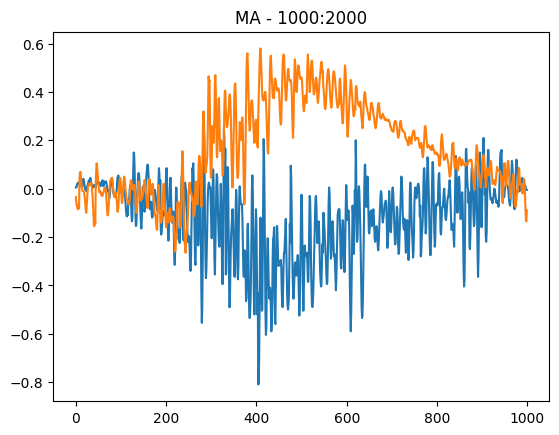

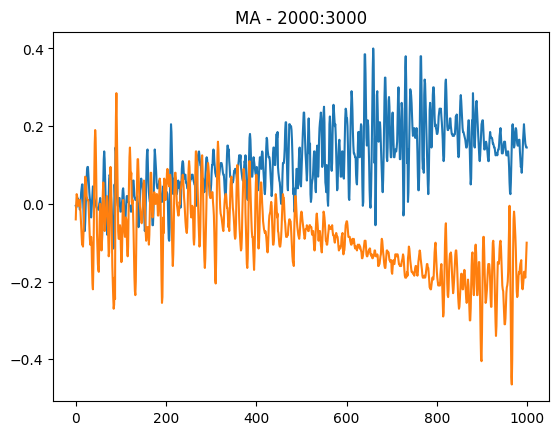

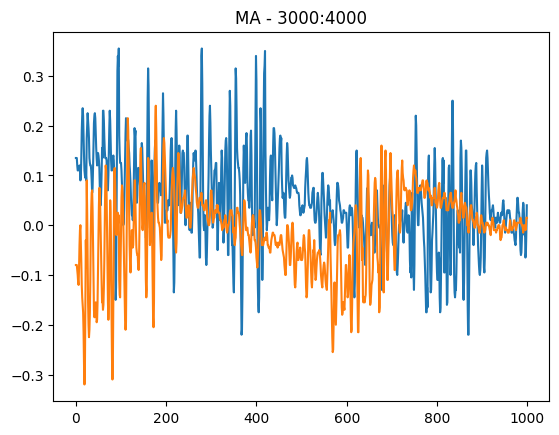

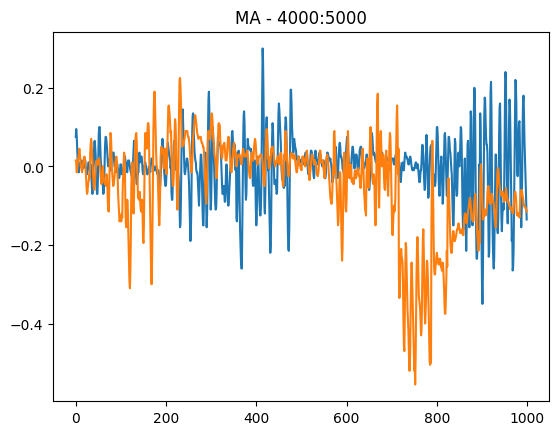

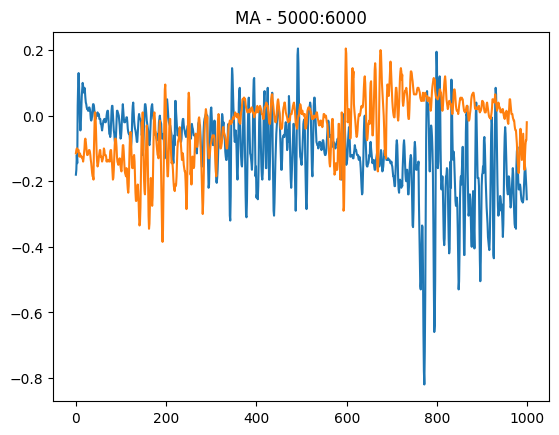

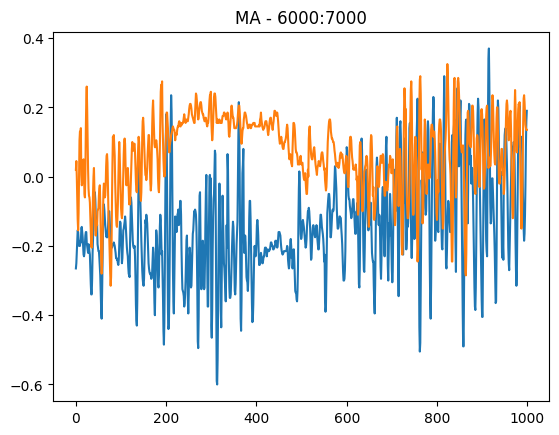

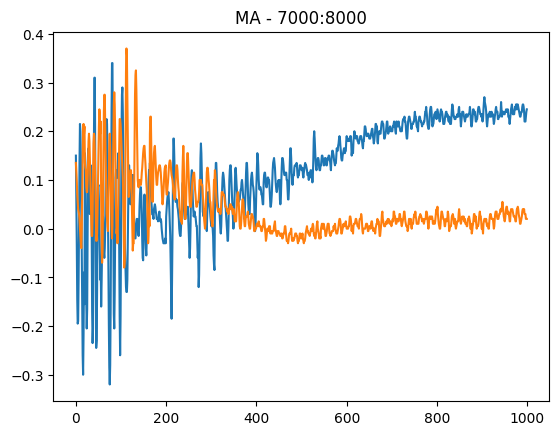

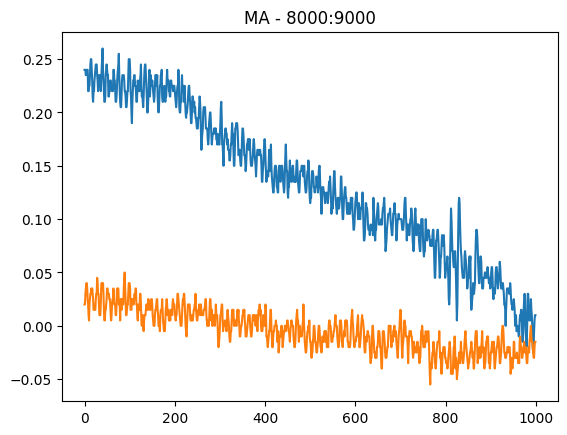

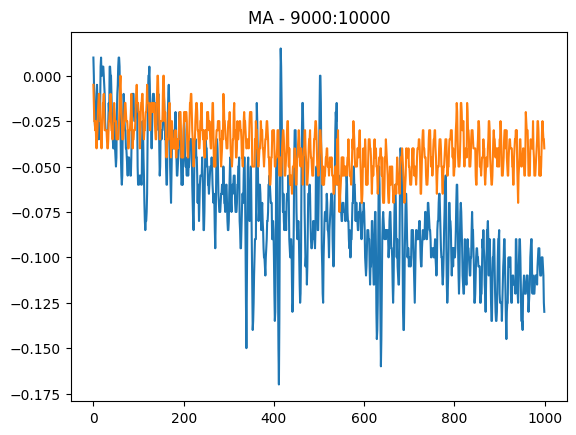

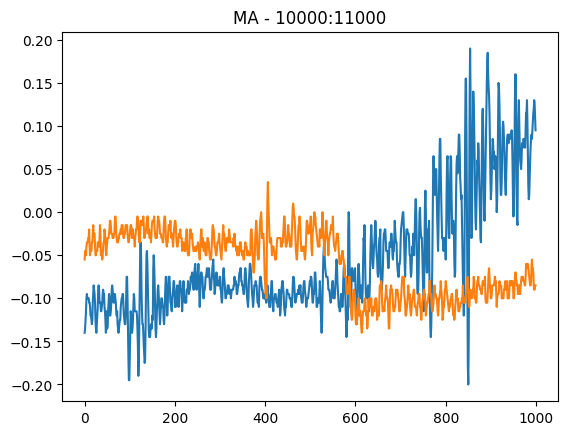

In [23]:
import matplotlib.pyplot as plt
for p in range(1,11):
  plt.plot(BW.p_signal[:,1][(p*1000):((p+1)*1000)])
  plt.plot(BW.p_signal[:,0][(p*1000):((p+1)*1000)])

  plt.title(f'BW - {p*1000}:{(p+1)*1000}')
  plt.show()

for p in range(1,11):
  plt.plot(EM.p_signal[:,1][(p*1000):((p+1)*1000)])
  plt.plot(EM.p_signal[:,0][(p*1000):((p+1)*1000)])

  plt.title(f'EM - {p*1000}:{(p+1)*1000}')
  plt.show()

for p in range(1,11):
  plt.plot(MA.p_signal[:,1][(p*1000):((p+1)*1000)])
  plt.plot(MA.p_signal[:,0][(p*1000):((p+1)*1000)])

  plt.title(f'MA - {p*1000}:{(p+1)*1000}')
  plt.show()


# Resample Noise Signals
We have different data sources in this work. Different sources are charactarized by different Hz:
- China:500Hz
- Ningbo:500Hz
- Georgia:500Hz
- Chapman:500Hz
- MIT Noise signals:360Hz
Let's resave the noise signals in 500 Hz.

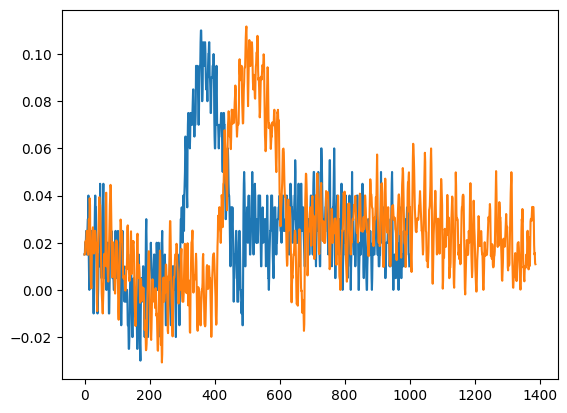

In [31]:
from scipy.signal import resample

plt.plot(MA.p_signal[:,1][:1000])

original_length = 1000
original_fs = 360
original_duration = original_length/original_fs

new_fs = 500
new_length = original_duration*new_fs

plt.plot(resample(MA.p_signal[:,1][:original_length],int(new_length)))
plt.show()

In [39]:
from scipy.signal import resample

def resample_(signal, original_fs, new_fs):
    """
    Resample a signal into     
    """
    
    original_length = len(signal)
    original_duration = original_length/original_fs
    new_length = original_duration*new_fs
    
    return resample(signal,int(new_length))

# plt.plot(resample_(signal=MA.p_signal[:,0], original_fs=360, new_fs=500))
MA_LI_resampled = resample_(signal=MA.p_signal[:,0], original_fs=360, new_fs=500)
MA_LII_resampled = resample_(signal=MA.p_signal[:,1], original_fs=360, new_fs=500)
EM_LI_resampled = resample_(signal=EM.p_signal[:,0], original_fs=360, new_fs=500)
EM_LII_resampled = resample_(signal=EM.p_signal[:,1], original_fs=360, new_fs=500)
BW_LI_resampled = resample_(signal=BW.p_signal[:,0], original_fs=360, new_fs=500)
BW_LII_resampled = resample_(signal=BW.p_signal[:,1], original_fs=360, new_fs=500)



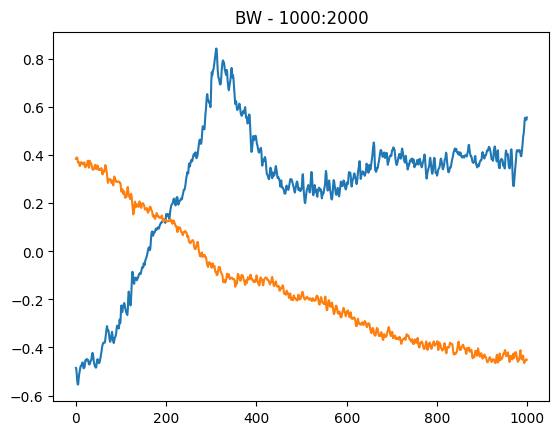

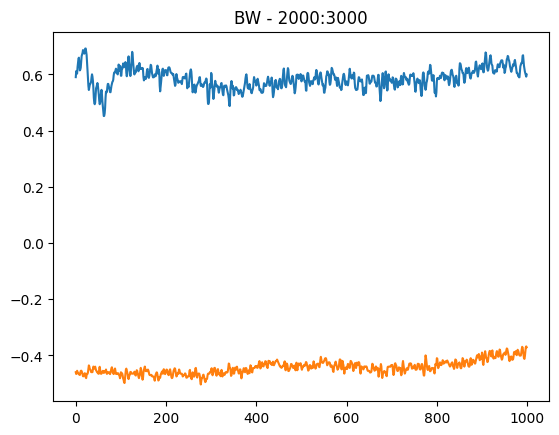

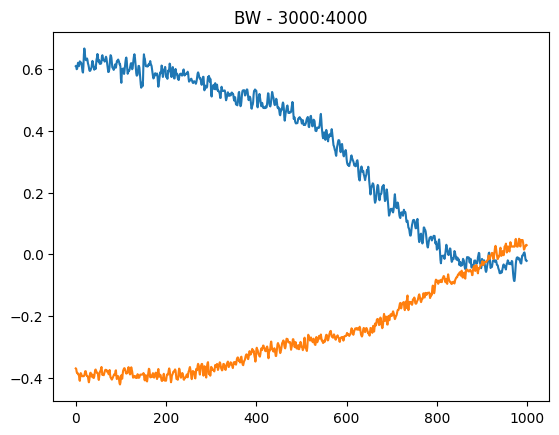

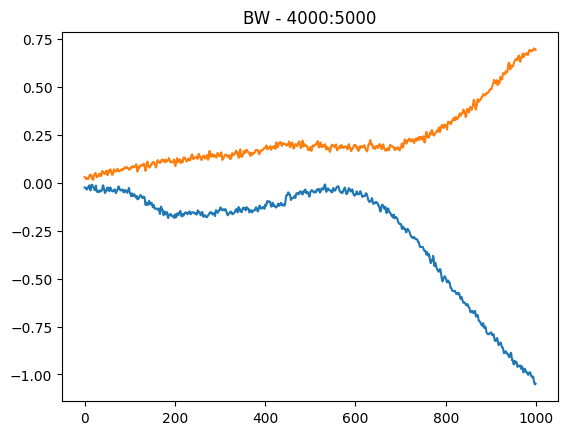

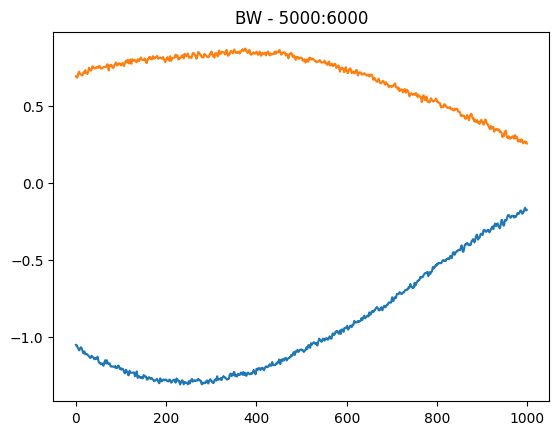

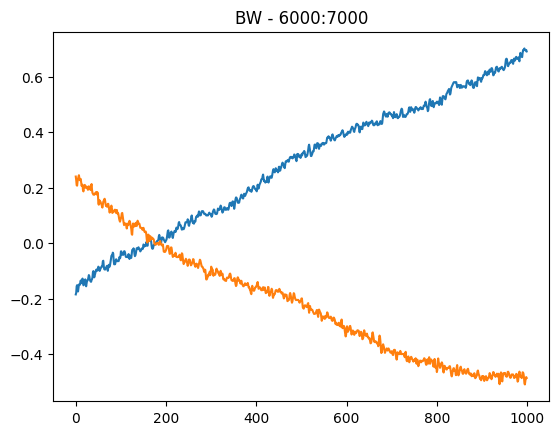

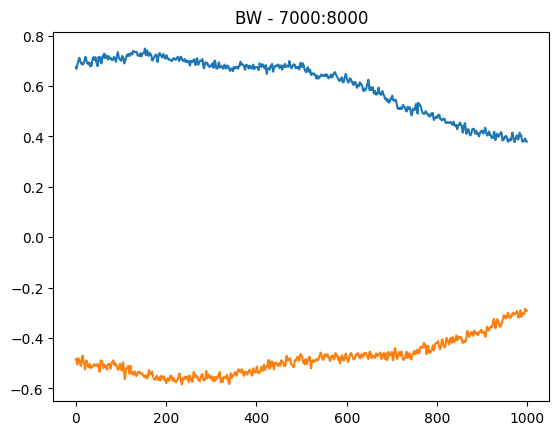

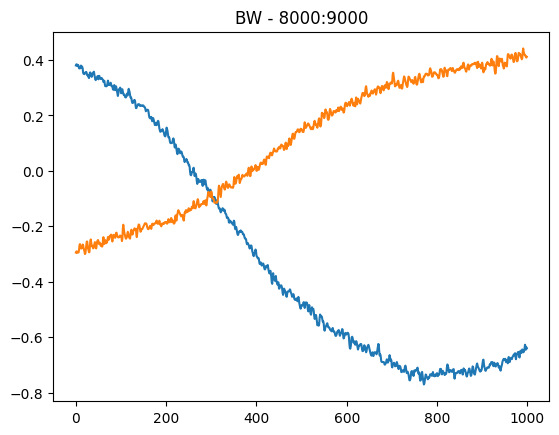

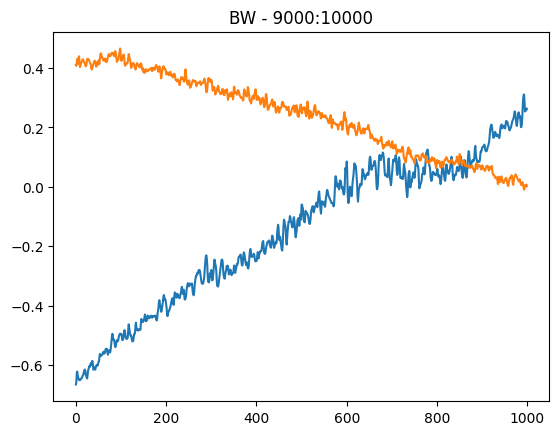

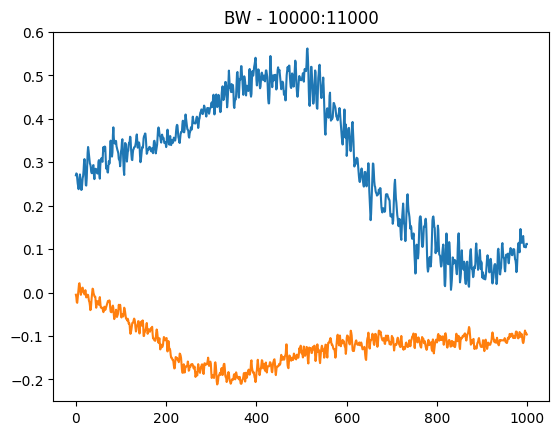

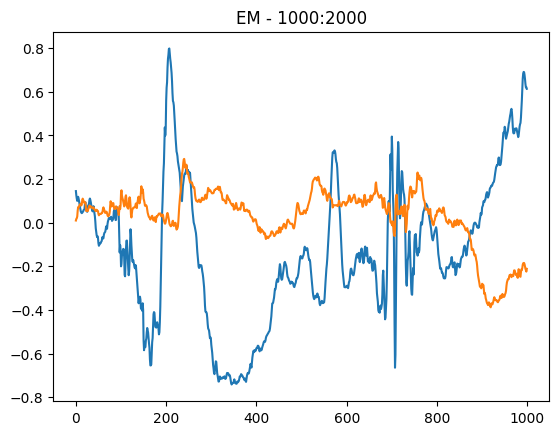

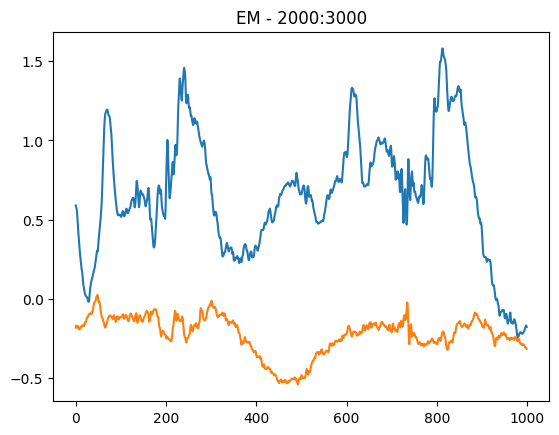

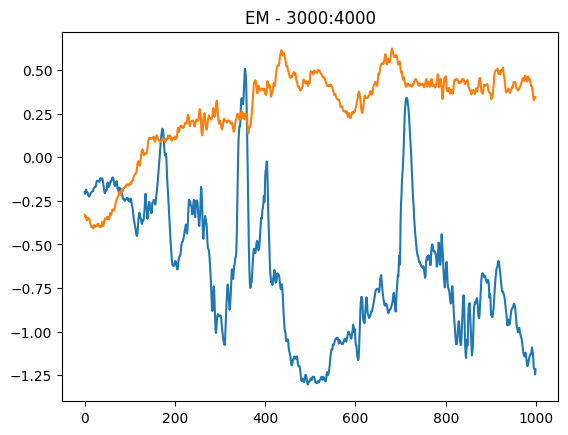

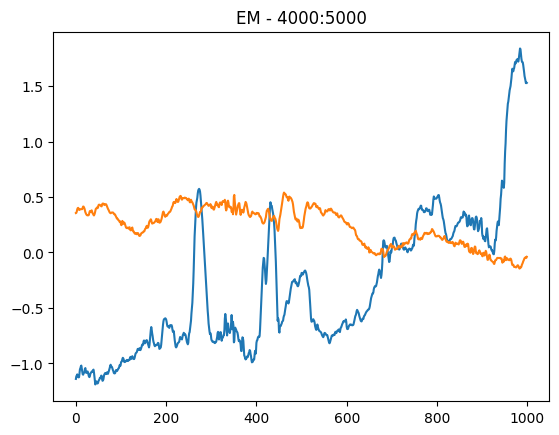

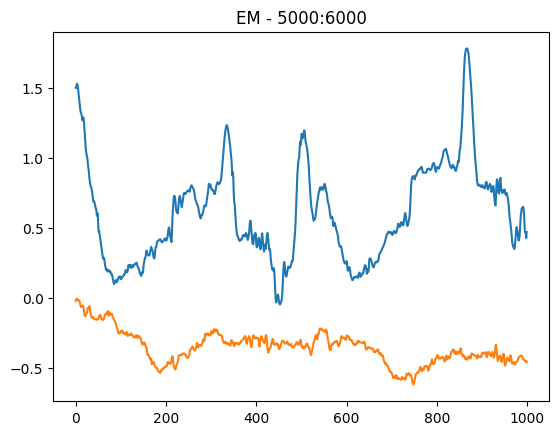

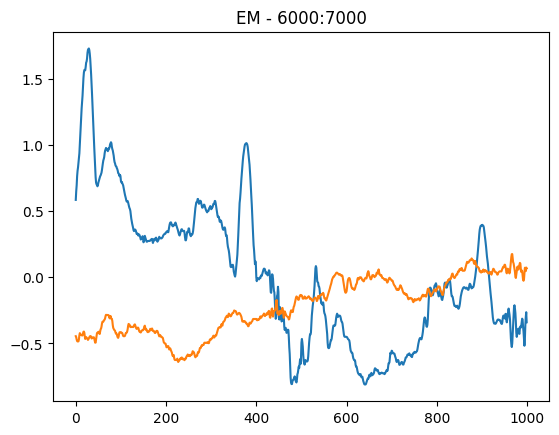

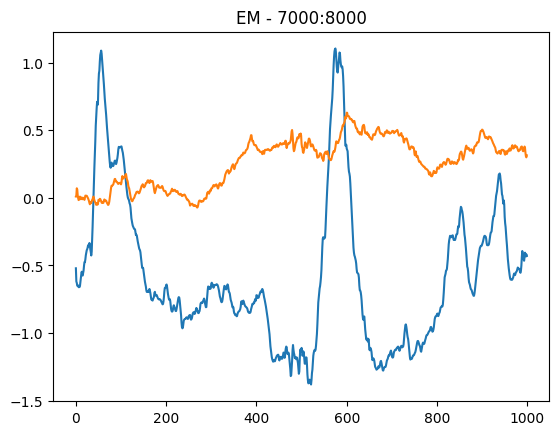

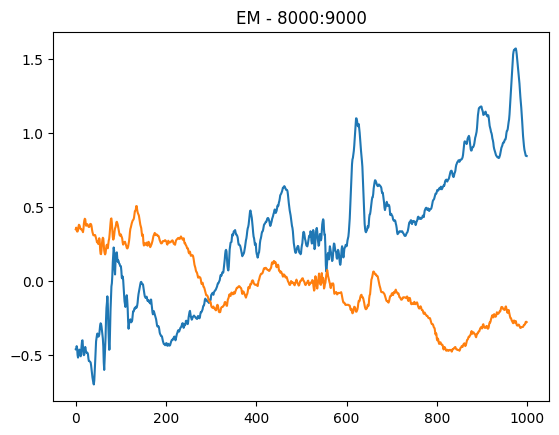

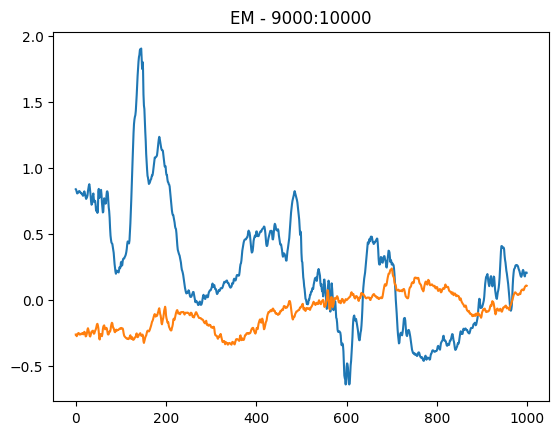

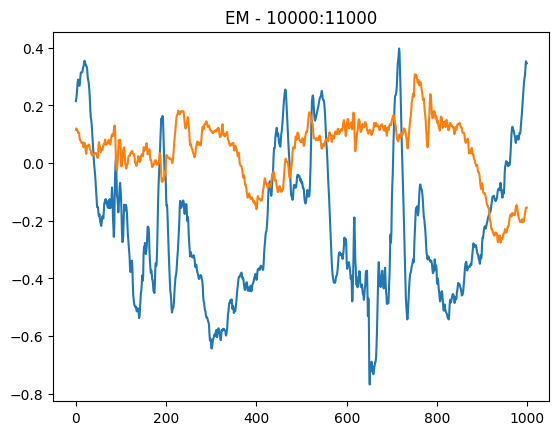

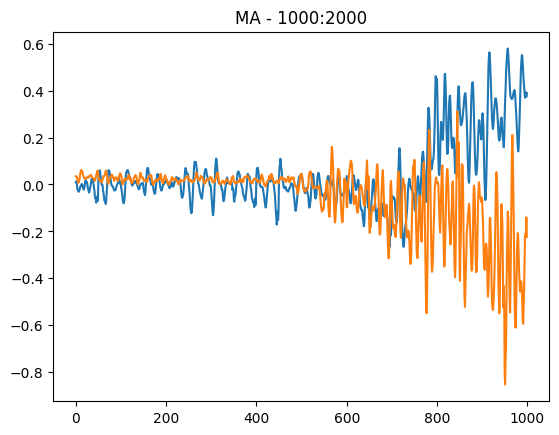

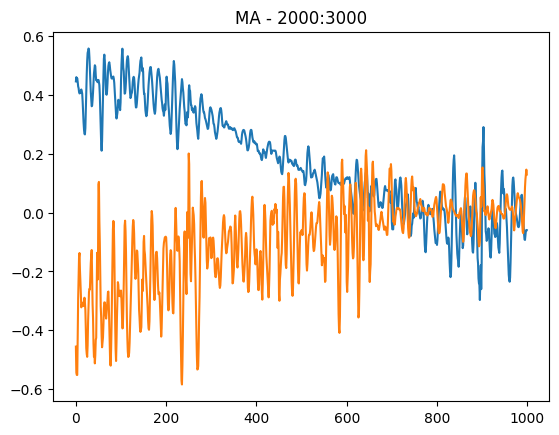

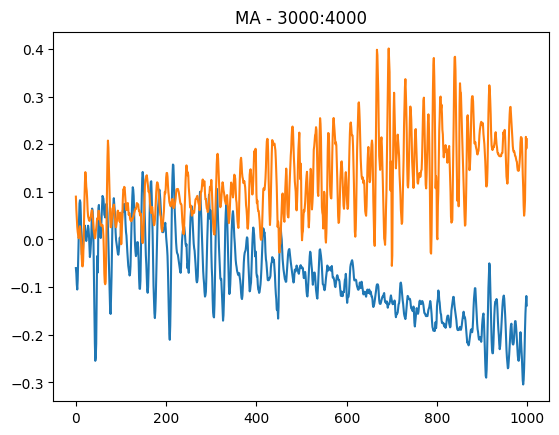

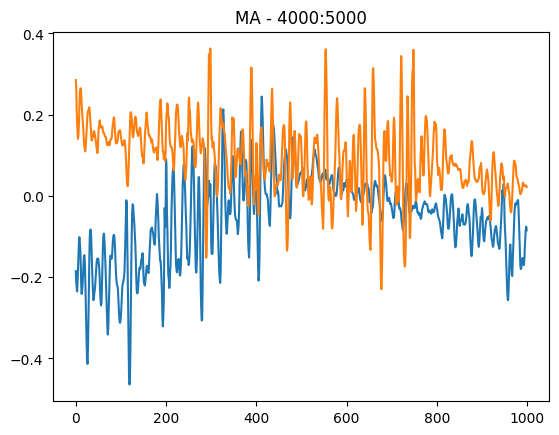

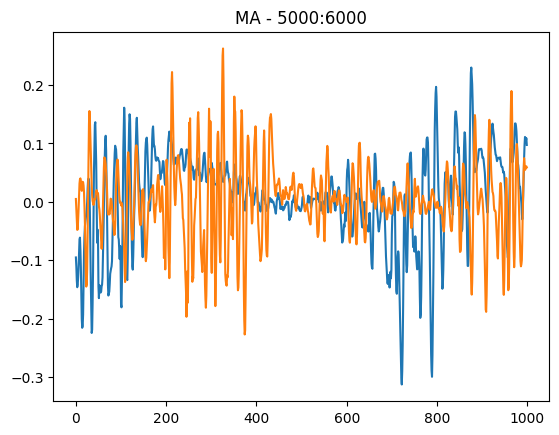

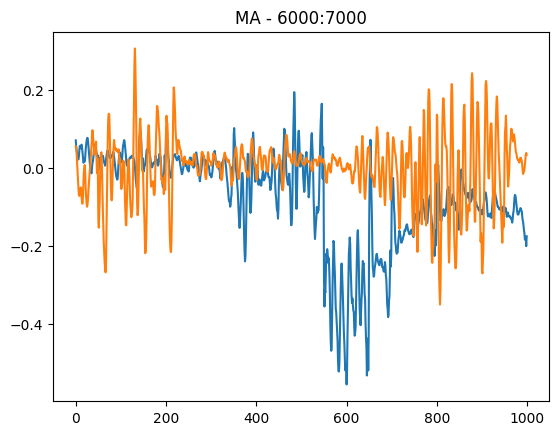

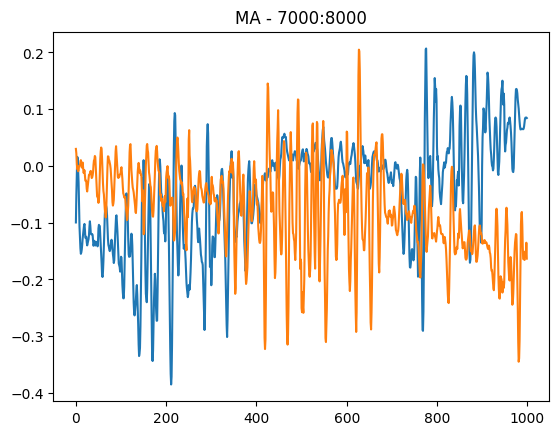

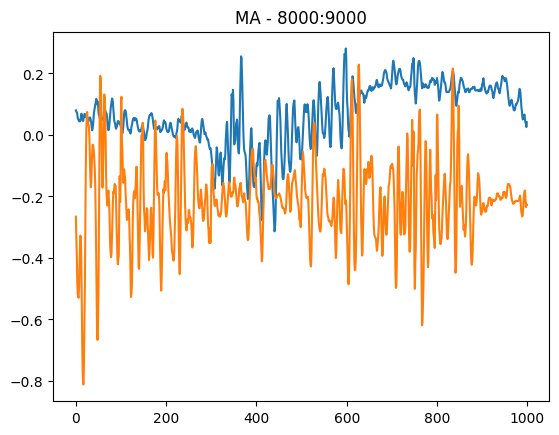

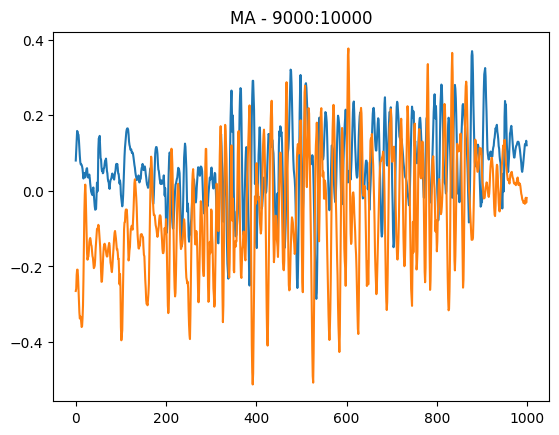

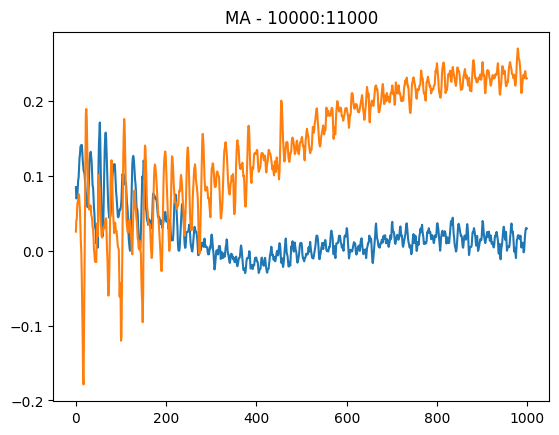

In [40]:
import matplotlib.pyplot as plt
for p in range(1,11):
  plt.plot(BW_LI_resampled[(p*1000):((p+1)*1000)])
  plt.plot(BW_LII_resampled[(p*1000):((p+1)*1000)])

  plt.title(f'BW - {p*1000}:{(p+1)*1000}')
  plt.show()

for p in range(1,11):
  plt.plot(EM_LI_resampled[(p*1000):((p+1)*1000)])
  plt.plot(EM_LII_resampled[(p*1000):((p+1)*1000)])

  plt.title(f'EM - {p*1000}:{(p+1)*1000}')
  plt.show()

for p in range(1,11):
  plt.plot(MA_LI_resampled[(p*1000):((p+1)*1000)])
  plt.plot(MA_LII_resampled[(p*1000):((p+1)*1000)])

  plt.title(f'MA - {p*1000}:{(p+1)*1000}')
  plt.show()


In [41]:
MA_LI_resampled = resample_(signal=MA.p_signal[:,0], original_fs=360, new_fs=500)
MA_LII_resampled = resample_(signal=MA.p_signal[:,1], original_fs=360, new_fs=500)
EM_LI_resampled = resample_(signal=EM.p_signal[:,0], original_fs=360, new_fs=500)
EM_LII_resampled = resample_(signal=EM.p_signal[:,1], original_fs=360, new_fs=500)
BW_LI_resampled = resample_(signal=BW.p_signal[:,0], original_fs=360, new_fs=500)
BW_LII_resampled = resample_(signal=BW.p_signal[:,1], original_fs=360, new_fs=500)


# with open('./data/processed/noise_MA_1.npy', 'wb') as f:
#     np.save(f, MA_LI_resampled)
# with open('./data/processed/noise_MA_2.npy', 'wb') as f:
#     np.save(f, MA_LII_resampled)

# with open('./data/processed/noise_EM_1.npy', 'wb') as f:
#     np.save(f, EM_LI_resampled)
# with open('./data/processed/noise_EM_2.npy', 'wb') as f:
#     np.save(f, EM_LII_resampled)

# with open('./data/processed/noise_BW_1.npy', 'wb') as f:
#     np.save(f, BW_LI_resampled)
# with open('./data/processed/noise_BW_2.npy', 'wb') as f:
#     np.save(f, BW_LII_resampled)
